# Type II Simulations

In [1]:
import sys
sys.path.insert(1, 'Functions')
final_fig_path = "../CH_Manuscript/Figures/"

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from fitness_funs_non_dim import *
from group_w_pop_funs import *
from scipy.optimize import fsolve
from sim_graph_funs import *
colors_x = ['k', 'b', 'r', 'm']


In [73]:
d = 10
β2 = 1

# Type II: Comparing Fast and Slow Group Dynamics

In [74]:
#H=3
x_max = 10
β1 = 10
β2 = 1
H2 = 1
H1 = H2 * β1/β2
params_pop1 = dict(η1 = 0.2, η2 = 0.4, A = 0.8, β1 = 10, β2 = 1, H1=H1, H2=1, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = d,
                 Tx = 0.01, r = 0, γ = 0, pop_process = True)

print_param_caption(**params_pop1)

The parameters are $\eta_1 = 0.2, \eta_2 = 0.4, A = 0.8, \beta_1 = 10, \beta_2 = 1, H_1 = 10.0, H_2 = 1, T_x = 0.01, \alpha_1(1) = 0.05, s_1 =2$, and $\alpha_2(x) = 0.95$ is constant.


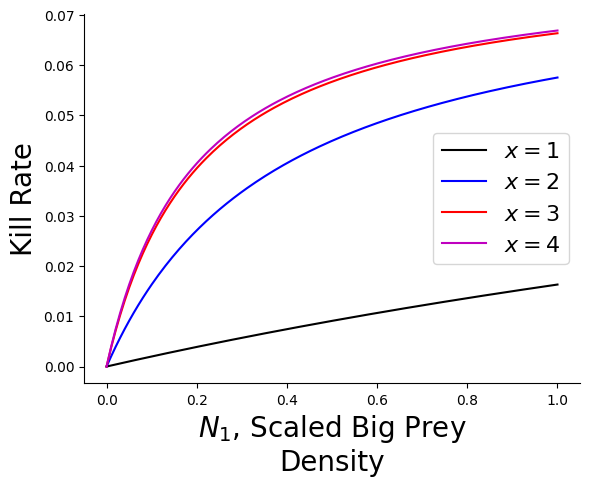

In [75]:
colors_x = ['k', 'b', 'r', 'm']
x_inputs = np.arange(1,10,1)
N1 = np.linspace(0,1,200)
N2 = 1
# set up figure
fig, ax = plt.subplots(1,1)
# plot for three x values
for i,x in enumerate([1,2,3,4]):
    ax.plot(N1, fun_f1(x,N1,N2,**params_pop1.copy()), c = colors_x[i], label = r'$x=$' + '%d'%x)
    # format figure
format_ax(ax,N1lab,"Kill Rate", xlim = None, ylim=None,
              fs_labs = 20, fs_legend = 16, if_legend = True,
             ncol_legend = 1)

In [66]:
p_reg = 5; N1_reg = 1; N2_reg = 1
g_of_x_vec = np.zeros(x_max)
x=3
g_of_x_vec[x-1] = p_reg/x
initialstate = [N1_reg, N2_reg, *g_of_x_vec];


## Fast Group Dynamics

In [67]:
params = params_pop1.copy()
initialstate = [N1_reg, N2_reg, *g_of_x_vec]; 
t_f=2000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T, N1, N2, P, g, mean_x = get_results(out2, x_max)



(0.0, 1.0)

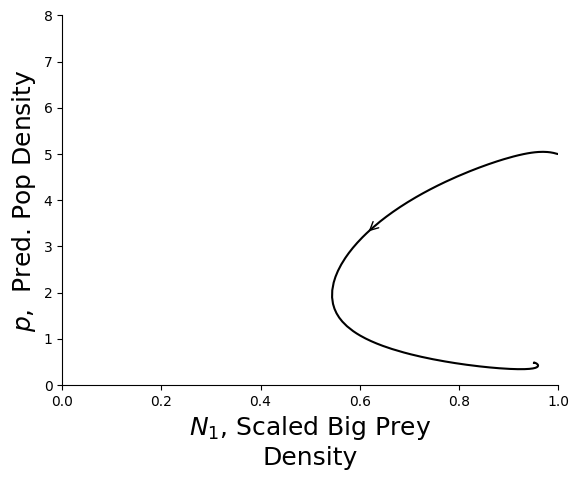

In [68]:
fig, ax = plot_x_vs_y(N1,P,N1lab,Plab,[100])
ax.set_ylim([0,8])
ax.set_xlim([0,1])

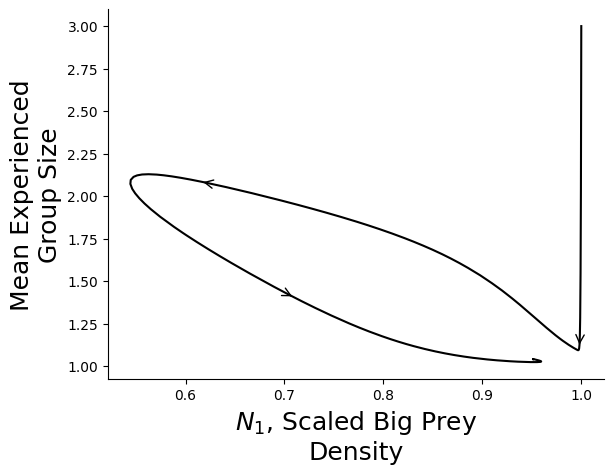

In [71]:
fig, ax = plot_x_vs_y(N1,mean_x,N1lab,mean_x_lab,[25,100,140])
#fig.savefig(final_fig_path + 'params_pop1_plot_N1_vs_meanx.png', bbox_inches = 'tight')

(0.0, 1.0)

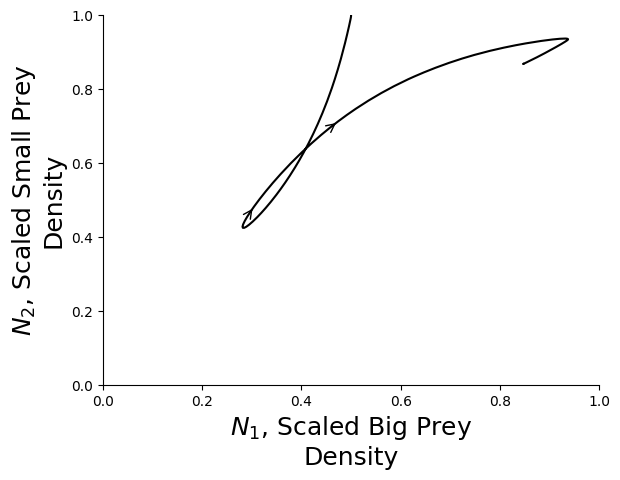

In [28]:
fig, ax = plot_x_vs_y(N1,N2,N1lab,N2lab,[90, 100])
ax.set_ylim([0,1])
ax.set_xlim([0,1])

1000.0


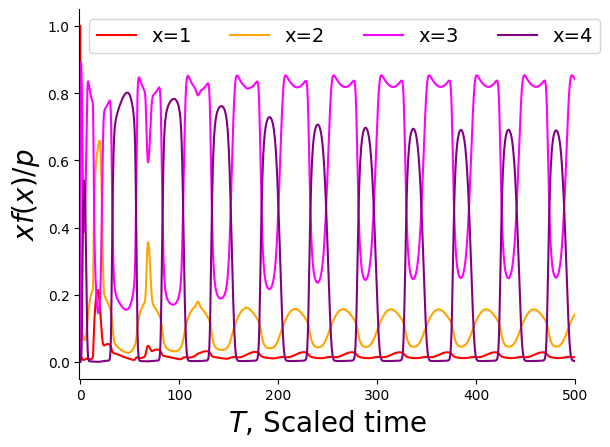

In [9]:
fig, ax  = plt.subplots(1,1)
g_of_x_vec = out2.y[3:]
fig, ax = plot_portion_x(fig, ax, out2, x_max, xlim = [-1,500])
plt.legend(fontsize = 14, ncol = 4)

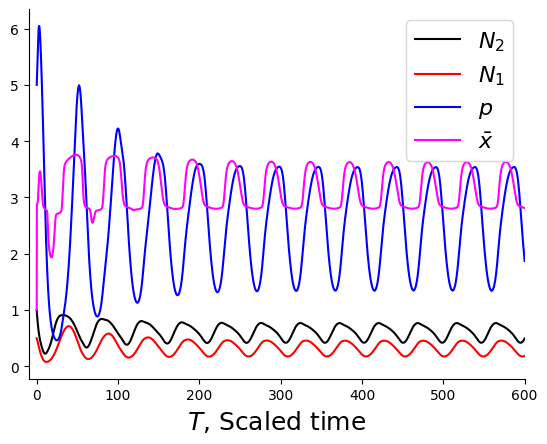

In [10]:
fig, ax = plot_all(T,N1,N2,P,mean_x, xlim = [-10, 600])
fig.savefig(final_fig_path + 'params_pop1_plotall.png', bbox_inches = 'tight')

## Slow Timescale

In [11]:
params = params_pop1.copy()
params['Tx'] = 1
x_max = 10

In [12]:
params = params_pop1
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))

T_slow, N1_slow, N2_slow, P_slow, F, mean_x_slow = get_results(out2, x_max)

1000.0


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$T$, Scaled time', ylabel='$xf(x)/p$'>)

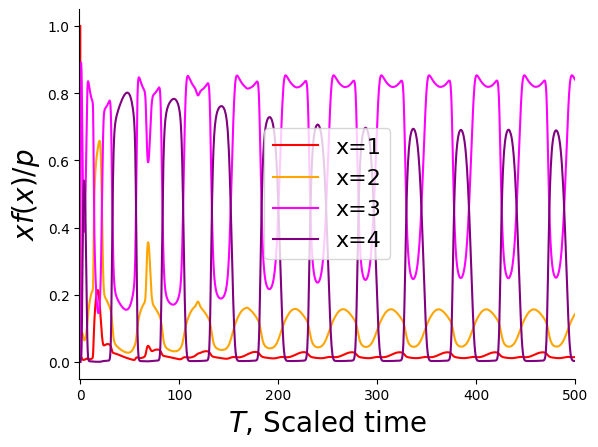

In [13]:
fig, ax  = plt.subplots(1,1)
g_of_x_vec = out2.y[3:]
plot_portion_x(fig, ax, out2, x_max, xlim = [-1,500])

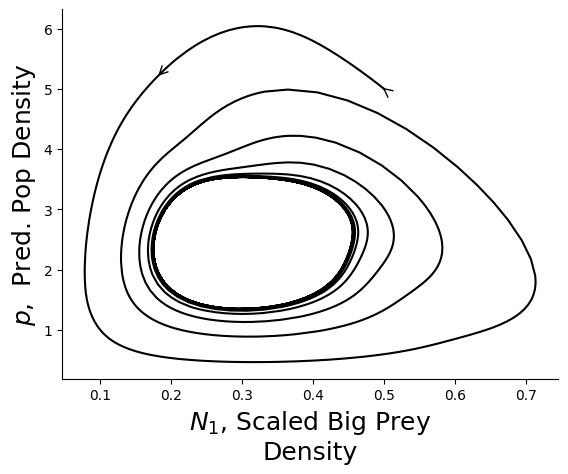

In [14]:
fig, ax = plot_x_vs_y(N1_slow, P_slow, N1lab, Plab, [50,150])


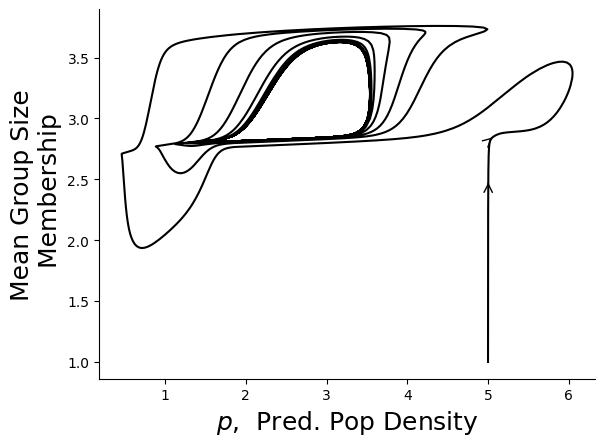

In [15]:
fig, ax = plot_x_vs_y(P_slow, mean_x_slow, Plab, mean_x_lab, [30,70])


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

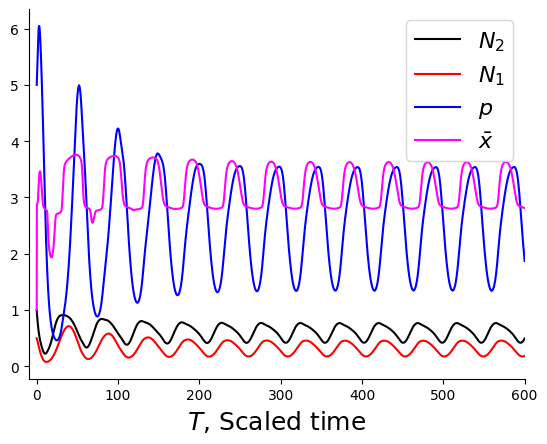

In [16]:
plot_all(T_slow, N1_slow, N2_slow, P_slow, mean_x_slow)

## very slow

In [17]:
params = params_pop1.copy()
params['Tx'] = 10

In [18]:
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T_slow2, N1_slow2, N2_slow2, P_slow2, F, mean_x_slow2 = get_results(out2, x_max)


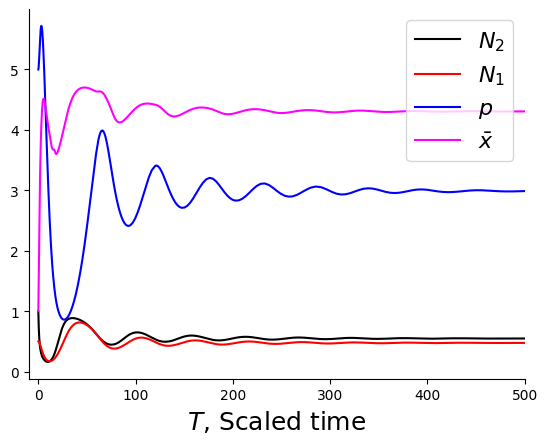

In [19]:
fig, ax = plot_all(T_slow2, N1_slow2, N2_slow2, P_slow2, mean_x_slow2, xlim = [-10,500])

## No Group Dynamics

### x = 1

In [32]:
final_fig_path

'../CH_popdyn_manuscript/Figures/'

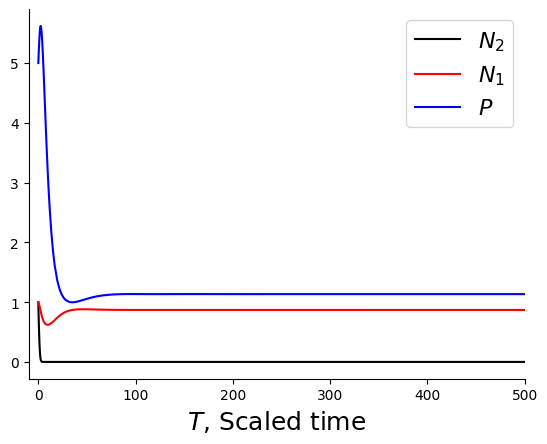

In [31]:
params = params_pop1.copy()

x=1

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
fig, ax = plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,500])
fig.savefig(final_fig_path + 'params_pop1_onex_1_plotall.png',bbox_inches = 'tight') 

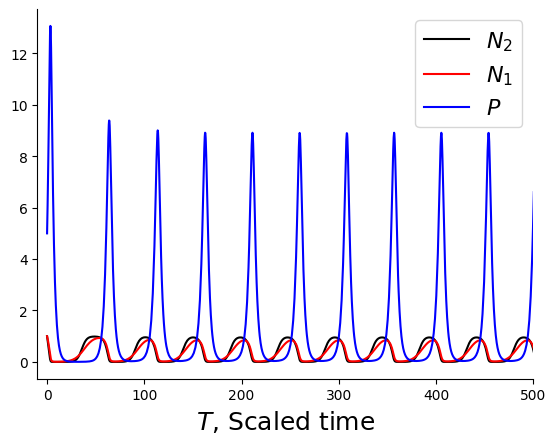

In [36]:
params = params_pop1.copy()

x=2

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
fig, ax = plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,500])
fig.savefig(final_fig_path + 'params_pop1_onex_2_plotall.png',bbox_inches = 'tight') 

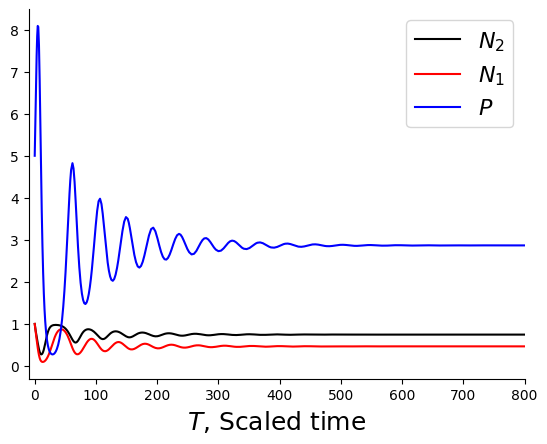

In [38]:
params = params_pop1.copy()

x=4

t_f=1000  

out2 = solve_ivp(model_one_x, [0, t_f], initialstate[:3], method="LSODA",
                args=(x,params))
#T, N1, N2, P, mean_x = get_results(out2, x_max)
T = out2.t
P, N1, N2 = out2.y
fig, ax = plot_all(T, N1, N2, P, mean_x = None,xlim = [-10,800])
fig.savefig(final_fig_path + 'params_pop1_onex_4_plotall.png',bbox_inches = 'tight')

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

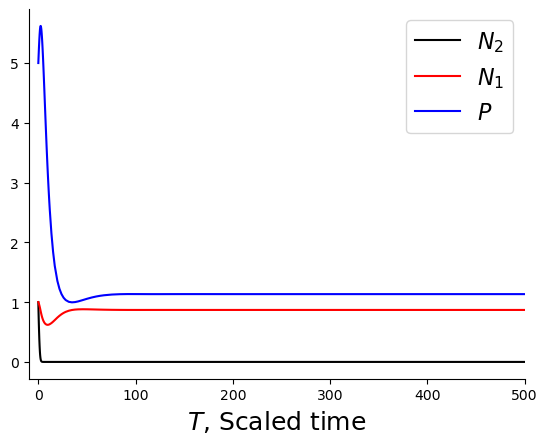

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$T$, Scaled time'>)

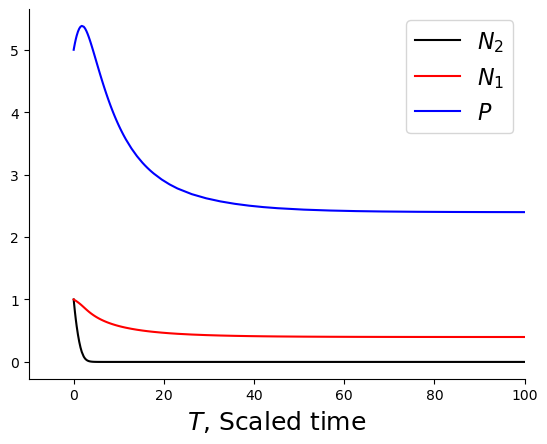

In [81]:
g_of_x_vec = np.zeros(x_max)
x=10
g_of_x_vec[x-1] = P_reg/x
initialstate[3:] = g_of_x_vec


t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(False,params))
T, N1, N2, P, mean_x = get_results(out2, x_max)
plot_all(T_x1, N1_x1, N2_x1, P_x1, mean_x = None,xlim = [-10,100])

In [42]:
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(False,params))

In [ ]:
P_x2, N1_x2, N2_x2 = out2.y[0:3]
g_of_x_vec_x2 = out2.y[3:]
mean_x_x2 = mean_group_size_membership(g_of_x_vec_slow.T, 10, P_slow)
T_x1 = out2.t

# Sigmoidal capture probability of small prey

In [3]:
H=2
x_max = 10
params_pop_sig = dict(η1 = 0.2, η2 = 0.4, A1 = 0.5, β1 = 10, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'sigmoid',
                  x_max = x_max, d = 100,
                 Tx = 0.01, r = 0, γ = 0, pop_process = True)

print_param_caption(**params_pop1)

NameError: name 'params_pop1' is not defined

In [109]:
P_reg = 5; N1_reg = 0.5; N2_reg = 1
g_of_x_vec = np.zeros(x_max)
x=1
g_of_x_vec[x-1] = P_reg/x
initialstate = [P_reg, N1_reg, N2_reg, *g_of_x_vec];


In [110]:
params = params_pop_sig.copy()
initialstate = [P_reg, N1_reg, N2_reg, *g_of_x_vec]; 
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T, N1, N2, P, F, mean_x = get_results(out2, x_max)



(0.0, 1.0)

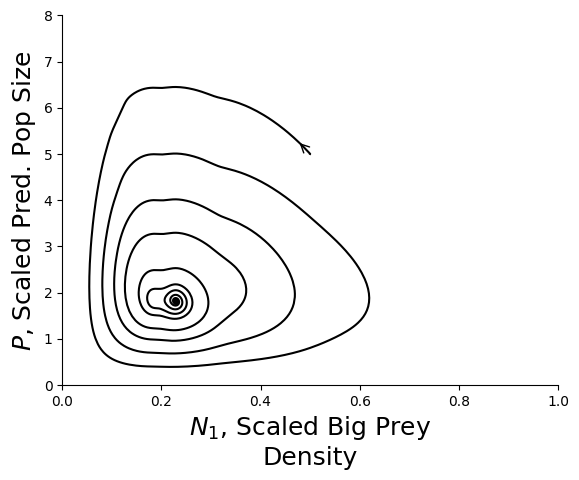

In [111]:
fig, ax = plot_x_vs_y(N1,P,N1lab,Plab,[90])
ax.set_ylim([0,8])
ax.set_xlim([0,1])

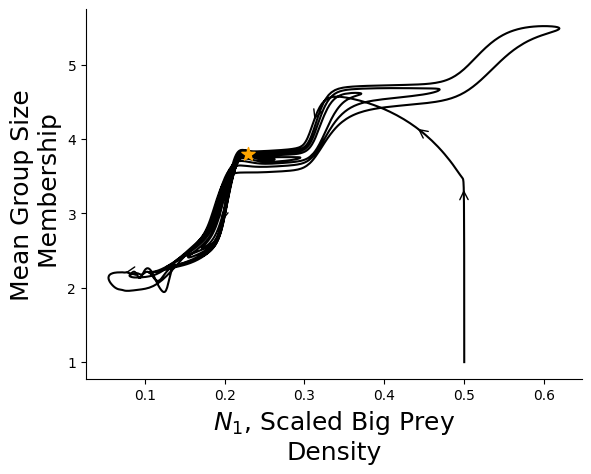

In [127]:
fig, ax = plot_x_vs_y(N1,mean_x,N1lab,mean_x_lab,[40,100,140, 225, 390])
plt.scatter(N1[-1],mean_x[-1],c='orange',marker = '*', s = 100, zorder = 3)
#fig.savefig(final_fig_path + 'params_pop1_plot_N1_vs_meanx.png', bbox_inches = 'tight')

(0.0, 1.0)

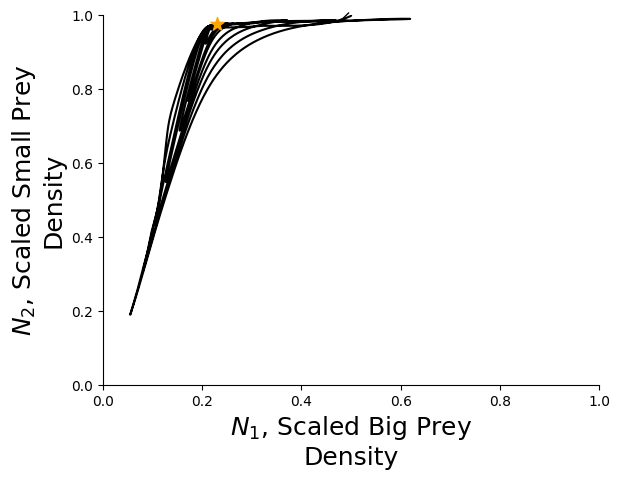

In [129]:
fig, ax = plot_x_vs_y(N1,N2,N1lab,N2lab,[90])
plt.scatter(N1[-1],N2[-1],c='orange',marker = '*', s = 100, zorder = 3)
ax.set_ylim([0,1])
ax.set_xlim([0,1])

In [114]:
plot_all?

Signature: plot_all(T, N1, N2, P, mean_x, xlim=[-10, 600])
Docstring: <no docstring>
File:      ~/Documents/CH_GroupFormation/CH_code/Functions/sim_graph_funs.py
Type:      function

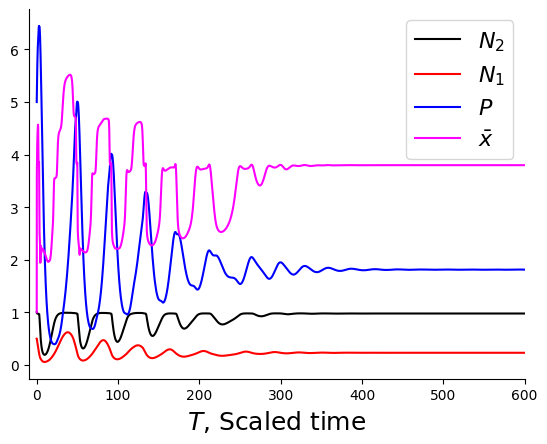

In [115]:
fig, ax = plot_all(T, N1, N2, P, mean_x, xlim=[-10, 600])


In [182]:
H=2
x_max = 10
params_pop_sig = dict(η1 = 0.2, η2 = 0.4, A1 = 0.5, β1 = 10, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'sigmoid',
                  x_max = x_max, d = 20,
                 Tx = 0.01, r = 0, γ = 0, pop_process = True)

print_param_caption(**params_pop1)

The parameters are $\xi = 2, \eta_1 = 0.2, \eta_2 = 0.4, A_1 = 0.5, \beta_1 = 10, \beta_2 = 1, H_1 = 2, H_2 = 2, T_x = 0.01, \alpha_1(1) = 0.05, s_1 =2$, and $\alpha_2(x) = 0.95$ is constant.


In [183]:
P_reg = 5; N1_reg = 0.5; N2_reg = 1
g_of_x_vec = np.zeros(x_max)
x=1
g_of_x_vec[x-1] = P_reg/x
initialstate = [P_reg, N1_reg, N2_reg, *g_of_x_vec];

params = params_pop_sig.copy()
initialstate = [P_reg, N1_reg, N2_reg, *g_of_x_vec]; 
t_f=1000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params))
T, N1, N2, P, F, mean_x = get_results(out2, x_max)



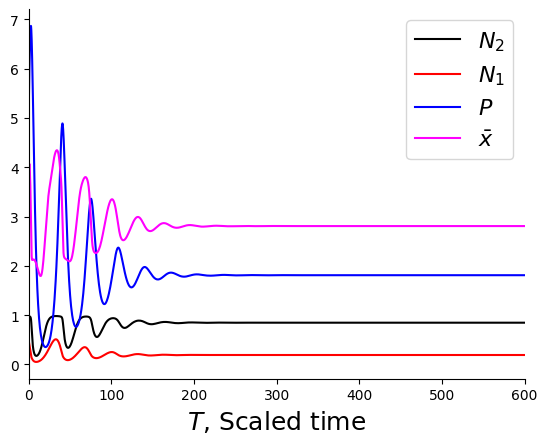

In [185]:
fig, ax = plot_all(T, N1, N2, P, mean_x, xlim=[0, 600])


In [186]:
N1[-1]

np.float64(0.19188632540026773)